<a href="https://colab.research.google.com/github/JFang2023/JF/blob/main/Machine%20Learning/Neural%20Network/Basic%20Classification/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow.compat.v1 as tf

from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.11.0


**Import the Fashion MNIST dataset**

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Explore the data

In [7]:
train_images.shape #60,000 images with each 28 * 28 pixels

(60000, 28, 28)

In [8]:
len(train_labels) #6000 labels

60000

In [9]:
train_labels #each label is an integer between 0 and 9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape #10,000 images with each 28 * 28 pixels

(10000, 28, 28)

In [11]:
len(test_labels)

10000

**Preprocess the data**

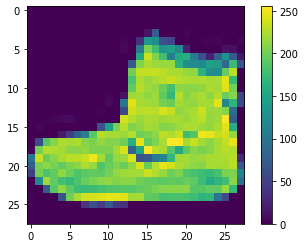

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images = train_images / 255.0 #scale these values to a range of 0 to 1 by divide 255

test_images = test_images / 255.0

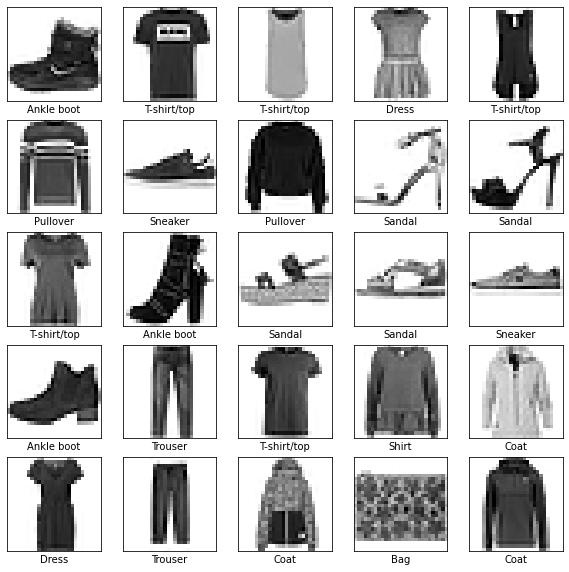

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Build the model**

setup the layers

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #28 by 28 pixels
    keras.layers.Dense(128, activation=tf.nn.relu), #The first Dense layer has 128 nodes
    keras.layers.Dense(10, activation=tf.nn.softmax) #The second one is a 10-node softmax layer and returns an array of 10 probability scores that sum to 1.
])

compile the model

In [20]:
model.compile(optimizer='adam', #optimizer — This is how the model is updated based on the data it sees and its loss function.
              loss='sparse_categorical_crossentropy', #loss - measures how accurate the model is during training
              metrics=['accuracy']) #metrics — monitor the training and testing steps

**Train the model**

In [21]:
model.fit(train_images, train_labels, epochs=5) #call the model.fit method—the model is "fit" to the training data

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 1.1030 - accuracy: 0.6523
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6502 - accuracy: 0.7658
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5742 - accuracy: 0.7934
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5308 - accuracy: 0.8116
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5017 - accuracy: 0.8230


**Evaluate accuracy**

In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.5164 - accuracy: 0.8150 - 695ms/epoch - 2ms/step
Test accuracy: 0.8149999976158142


**Make predictions**

In [23]:
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 3ms/step


array([1.2913696e-06, 1.8574188e-08, 5.9386011e-06, 5.2431315e-06,
       1.1189636e-05, 1.6466433e-01, 1.5805263e-05, 3.3374593e-01,
       9.4460417e-03, 4.9210417e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

In [25]:
test_labels[0]

9

In [26]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

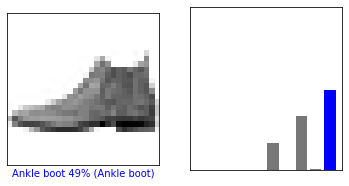

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

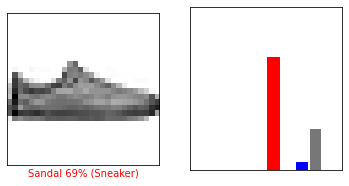

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

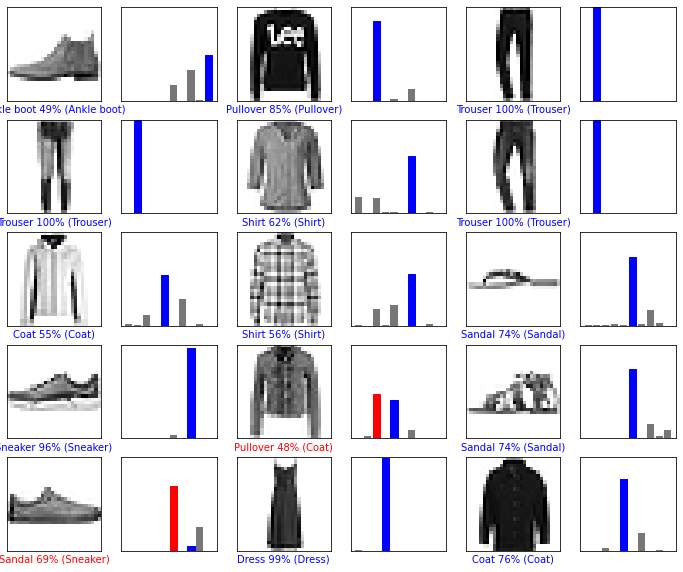

In [29]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.show()

In [30]:
img = test_images[1]

print(img.shape)

(28, 28)


In [31]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [32]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 32ms/step
[[6.3680531e-04 1.7049166e-05 8.4903616e-01 7.0577524e-05 1.9538909e-02
  7.6126838e-09 1.3051157e-01 4.7872128e-13 1.8899163e-04 2.2428961e-09]]


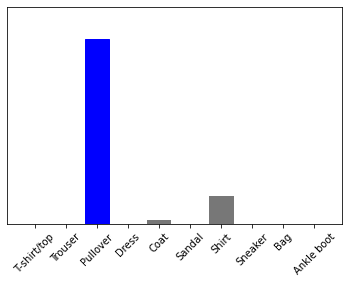

In [33]:
plot_value_array(1, predictions_single[0], test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [34]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

2
